# Connecting to Google Drive 

In [ ]:
#DATA THE DATA TO YOUR DRIVE 
# we need find a way to import the data. If someone can push train.csv to main github it will work. I have problem in working with git.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Change to directory in Drive where datasets are located

In [ ]:
#cd '/content/drive/MyDrive/datasets' #after connecting to drive and change file path
import os
os.chdir('/content/drive/MyDrive/Datascience')

#Importing Libraries

In [ ]:
#Import the required libraries
import pandas as pd
import matplotlib as plt
import seaborn as snb
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Dataset with all patients (with 40336 patients)

In [ ]:
#Original dataset
df=pd.read_csv("Dataset.csv")

In [ ]:
df.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

# Dataset with septic patients (with 2932 patients)

In [ ]:
#Sepsis Only DataSet
df_sepsis_only_dataset=pd.read_csv("septic_patients_data_alone_df.csv")

In [ ]:
df_sepsis_only_dataset.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP',
       'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH',
       'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride',
       'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1',
       'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID',
       'sepsisType'],
      dtype='object')

# Dataset with septic patients imputed with MICE (with 2932 patients)



In [ ]:
#MICE DataSet
df_MICE=pd.read_csv("sepsis_patients_MICE.csv")

In [ ]:
df_MICE.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP',
       'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH',
       'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride',
       'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1',
       'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID',
       'sepsisType'],
      dtype='object')

# Dataset with septic patients imputed with Linear Interpolation (with 2932 patients)

In [ ]:
#Interpolated DataSet
df_interpolation=pd.read_csv("InterpolateWithNull.csv")

In [ ]:
df_interpolation.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Hour', 'HR', 'O2Sat',
       'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3',
       'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium',
       'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate',
       'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI',
       'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender',
       'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID',
       'sepsisType'],
      dtype='object')

# Dataset with septic patients imputed with KNN (with 2932 patients)

In [ ]:
#knn dataset
df_knn=pd.read_csv("KNN_IMPUTE_FINALL.csv")

In [ ]:
df_knn.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Hour', 'HR', 'O2Sat',
       'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess', 'HCO3', 'FiO2', 'pH',
       'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride',
       'Creatinine', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'Hct', 'Hgb', 'PTT', 'WBC', 'Platelets',
       'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

# Generic Function to drop columns with missing values > 60%

In [ ]:
def drop_columns(drop_df):
  drop_columns=['EtCO2','Bilirubin_direct','TroponinI','Fibrinogen','sepsisType','Unit1',
       'Unit2']
  drop_df=drop_df.drop(drop_columns,axis=1, errors='ignore')
  return drop_df


# Drop the columns with missing values > 60 % from 5 dataset

In [ ]:
df=drop_columns(df)
df_sepsis_only_dataset=drop_columns(df_sepsis_only_dataset)
df_MICE=drop_columns(df_MICE)
df_interpolation=drop_columns(df_interpolation)
df_knn=drop_columns(df_knn)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST',
       'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Glucose',
       'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total',
       'Hct', 'Hgb', 'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'HospAdmTime',
       'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [ ]:
df.shape

(1552210, 44)

In [ ]:
df_sepsis_only_dataset.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP',
       'MAP', 'DBP', 'Resp', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2',
       'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride',
       'Creatinine', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'Hct', 'Hgb', 'PTT', 'WBC', 'Platelets',
       'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [ ]:
df_sepsis_only_dataset.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP',
       'MAP', 'DBP', 'Resp', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2',
       'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride',
       'Creatinine', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'Hct', 'Hgb', 'PTT', 'WBC', 'Platelets',
       'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [ ]:
df_MICE.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP',
       'MAP', 'DBP', 'Resp', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2',
       'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride',
       'Creatinine', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'Hct', 'Hgb', 'PTT', 'WBC', 'Platelets',
       'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [ ]:
df_MICE.shape

(172410, 46)

In [ ]:
df_interpolation.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Hour', 'HR', 'O2Sat',
       'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess', 'HCO3', 'FiO2', 'pH',
       'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride',
       'Creatinine', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'Hct', 'Hgb', 'PTT', 'WBC', 'Platelets',
       'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [ ]:
df_interpolation.shape

(172410, 40)

In [ ]:
df_knn.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Hour', 'HR', 'O2Sat',
       'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess', 'HCO3', 'FiO2', 'pH',
       'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride',
       'Creatinine', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'Hct', 'Hgb', 'PTT', 'WBC', 'Platelets',
       'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [ ]:
df_knn.shape

(172410, 40)

# followed below site for simple xgb classifier
https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390

# Function for Simple XGB Imputer

In [ ]:
#function xgboost_base takes dataset as input , split to train/test , run the model , validate and return accuracy
def xgboost_base(train):
  x = train.drop(['SepsisLabel'], axis=1) # assigning features to x, y
  y = train['SepsisLabel']
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
  xgb_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimator=6,seed=42)
  xgb_cl.fit(x_train, y_train)
  preds = xgb_cl.predict(x_val)
  accuracy = accuracy_score(y_val, preds)
  return accuracy

# Find accuracy of XGBoost for each of 5 datasets

In [ ]:
accuracy_original_dataset=xgboost_base(df)
accuracy_sepsis_only_dataset=xgboost_base(df_sepsis_only_dataset)
accuracy_df_MICE=xgboost_base(df_MICE)
accuracy_df_interpolation=xgboost_base(df_interpolation)
accuracy_df_knn=xgboost_base(df_knn)

# Print accuracy values of 5 datasets

In [ ]:
print("accuracy_original_dataset: %.2f%%" % (accuracy_original_dataset * 100.0))
print("accuracy_sepsis_only_dataset: %.2f%%" % (accuracy_sepsis_only_dataset * 100.0))
print("accuracy_df_MICE: %.2f%%" % (accuracy_df_MICE * 100.0))
print("accuracy_df_interpolation: %.2f%%" % (accuracy_df_interpolation * 100.0))
print("accuracy_df_knn: %.2f%%" % (accuracy_df_knn * 100.0))

accuracy_original_dataset: 98.22%
accuracy_sepsis_only_dataset: 83.83%
accuracy_df_MICE: 83.81%
accuracy_df_interpolation: 85.37%
accuracy_df_knn: 83.89%


In [ ]:
# initialize list of lists
data = [['All_Patients_WithNull', accuracy_original_dataset*100], 
        ['Septic_Patients_WithNull', accuracy_sepsis_only_dataset*100], 
        ['Septic_Patients_MICE', accuracy_df_MICE*100],
        ['Septic_Patients_Interpolation', accuracy_df_interpolation*100],
        ['Septic_Patients_KNN', accuracy_df_knn*100]]
 
# Create the pandas DataFrame
accuracy = pd.DataFrame(data, columns = ['DataSet', 'Accuracy %'])
accuracy

,DataSet,Accuracy %
0,All_Patients_WithNull,98.215126
1,Septic_Patients_WithNull,83.826344
2,Septic_Patients_MICE,83.814744
3,Septic_Patients_Interpolation,85.374978
4,Septic_Patients_KNN,83.887246


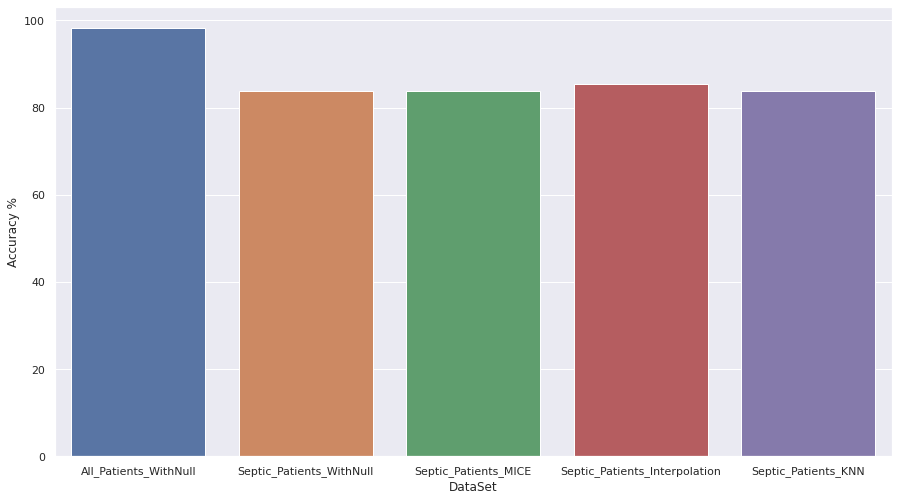

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8.27)})
sns.barplot(x="DataSet", y="Accuracy %", data=accuracy)